# CO416 - Machine Learning for Imaging

## Coursework 1 - Classification

In this coursework you will be applying the material taught in the course up to and including lecture 4.

$\mathbf{NOTE - \text{READ THIS}:}$ 
- During this coursework you will be asked to comment on the performance of various aspects of the models you develop. The discussion should be done along the following lines:
    - Maximum 100 words of discussion - You are asked to be brief and on point, platitudes and excessive writing will be penalized
    - You should mention effects on accuracy, and computational requirements i.e. time and computational complexities. Empirical arguments are accepted 
    
- When you are asked to change the hyperparamenters, validate the performance of your classifier and explicitly state the optimal hyperparameters you found and their accuracy

## Question 1 (50 Points) 

In this question we will use a toy spiral dataset as generated by the [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function of sklearn

1) Create a dataset of 1000 points with a noise value of 0.1 and random_state=0 and augment it using polynomial features (recommended degree 10-15) (4 points)

In [1]:
## ADD YOUR CODE HERE
import numpy as np
import struct 
import gzip
import pandas as pd 
import sklearn
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
import sklearn.pipeline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, AdaBoostClassifier
from sklearn import tree


np.random.seed(42)
X, Y = make_moons(1000, noise=0.42,random_state=None)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

poly = PolynomialFeatures(degree=12)

x_train_poly = poly.fit_transform(x_train.reshape(800,-1))

poly = PolynomialFeatures(degree=12)

x_test_poly = poly.fit_transform(x_test.reshape(200,-1))


x_train_poly, x_val_poly, y_train, y_val = train_test_split(x_train_poly, y_train, test_size = 0.1)

2) Visualize your input data - the first 2 dimensions would suffice  (3 points)



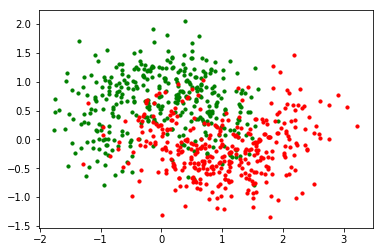

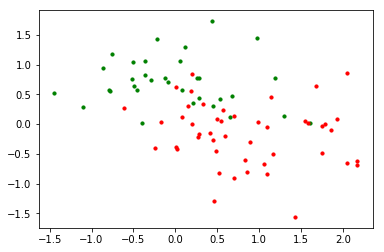

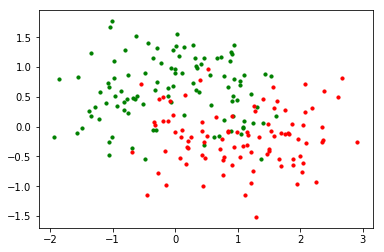

In [2]:
## ADD YOUR CODE HERE
plt.figure()
plt.scatter(x_train_poly[:,1][y_train == 0], 
            x_train_poly[:,2][y_train == 0], c='g', s=10.0)
plt.scatter(x_train_poly[:,1][y_train == 1], 
            x_train_poly[:,2][y_train == 1], c='r', s=10.0)

plt.figure()
plt.scatter(x_val_poly[:,1][y_val == 0], 
            x_val_poly[:,2][y_val == 0], c='g', s=10.0)
plt.scatter(x_val_poly[:,1][y_val == 1], 
            x_val_poly[:,2][y_val == 1], c='r', s=10.0)

plt.figure()
plt.scatter(x_test_poly[:,1][y_test == 0], 
            x_test_poly[:,2][y_test == 0], c='g', s=10.0)
plt.scatter(x_test_poly[:,1][y_test == 1], 
            x_test_poly[:,2][y_test == 1], c='r', s=10.0)


3) Use a Decision Tree to classify the data (5 points)



In [3]:
## ADD YOUR CODE HERE
clf = tree.DecisionTreeClassifier(random_state = 42)
clf = clf.fit(x_train_poly, y_train)
print('accuracy: ', clf.score(x_test_poly,y_test))

accuracy:  0.785


4) Try both Gini Impurity and Information Gain, which performs better? What is the difference between them? (4 points)

In [4]:
## ADD YOUR CODE HERE
clf_gini = tree.DecisionTreeClassifier(criterion="gini", random_state = 42)
clf_gini = clf_gini.fit(x_train_poly, y_train)
clf_entropy = tree.DecisionTreeClassifier(criterion="entropy", random_state = 42)
clf_entropy = clf_entropy.fit(x_train_poly, y_train)

y_test_pred_gini = clf_gini.predict(x_test_poly)
y_test_pred_entropy = clf_entropy.predict(x_test_poly)
print('gini accuracy: ', clf_gini.score(x_test_poly,y_test))
print('entropy accuracy: ', clf_entropy.score(x_test_poly,y_test))


gini accuracy:  0.785
entropy accuracy:  0.765


According to this example, the cost function of Gini Impurity performs better than the Information Gain.
The difference is that Information Gain calculates the logarithm of probability, while the Gini Index calculates the probability. So the calculation speed of the Gini Index is faster. 
Besides that, the Gini Index tends to isolate the largest class in the branches of the tree, while the Information Gain tends to produce slightly more balanced decision tree models.

5) Perform classification using a tree depth of 1-20. Plot the accuracy versus tree depth. (5 points)



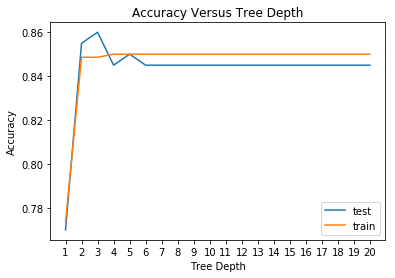

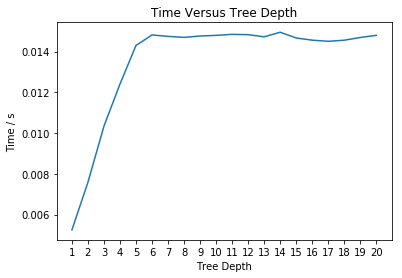

In [5]:
## ADD YOUR CODE HERE
import time
train_acc = []
test_acc = []
times = []
# x_axis = np.linspace(1, 20, 20)
x_axis = np.arange(1, 21)
for i in range(1, 21):
    start = time.clock()
    clf = tree.DecisionTreeClassifier(criterion='gini',
                    splitter='best', max_depth=i, min_samples_split=2,
     min_samples_leaf=1, min_weight_fraction_leaf=0.05, max_features=None,
     random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0,
     min_impurity_split=None, class_weight=None, presort=False)
#     clf = tree.DecisionTreeClassifier(max_depth=i, random_state = 42)
    clf = clf.fit(x_train_poly, y_train)
    end = time.clock()
    train_acc.append(clf.score(x_train_poly, y_train))
    test_acc.append(clf.score(x_test_poly,y_test))
    times.append(end - start)
plt.figure()
plt.title("Accuracy Versus Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.xticks(x_axis)
plt.plot(x_axis, test_acc, label='test')
plt.plot(x_axis, train_acc, label='train')
plt.legend()

plt.figure()
plt.title("Time Versus Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Time / s")
plt.xticks(x_axis)
plt.plot(x_axis, times)
plt.show()

6) How does the depth of a tree affect performance and computational burden? (1 points)



Generally, as the depth increases, the performance ascended in the beginning, but quickly started to stabilize with fluctuation and reached a constant value thereafter. Meanwhile, we observed a logarithmic growth over running time which shows a logarithmic growth in computational burden.

7) Use Bootstrap Classifier to classify your data, base estimator should be a decision tree. Tune hyperparameters of tree depth, n_of estimators, max_samples and bootstrap. Plot accuracy versus different hyperparameters. (7 points)



In [6]:
## ADD YOUR CODE HERE
acc = []
# find optimal hyperparameters
max_depth = range(1,21)
n_estimators = range(1, 21)
max_samples = range(1, 10)
bootstrap = [0, 1]
accuracy = np.zeros((len(max_depth), len(n_estimators), 
                     len(max_samples), len(bootstrap)))

for i in max_depth:
    for j in n_estimators:
        for p in max_samples:
            for q in bootstrap:
                base_estimator = tree.DecisionTreeClassifier(max_depth = i, random_state = 42)
                bag = BaggingClassifier(base_estimator=base_estimator,
                            n_estimators = j, 
                            max_samples=float(p)/10.0, 
                            bootstrap = q, random_state = 42).fit(x_train_poly, y_train)
                score = bag.score(x_val_poly,y_val)
                accuracy[i - 1, j - 1, p - 1, q] = score
# print("ScoreOnTest: " +str(bestBagClassifier.score(x_test_poly,y_test)))


In [7]:
best_params = np.unravel_index(accuracy.argmax(), accuracy.shape)
best_max_depth = best_params[0] + 1
best_n_estimators = best_params[1] + 1
best_max_samples = (best_params[2] + 1) / 10.0
best_bootstrap = best_params[3]
print ("best max_depth: ", best_max_depth)
print ("best n_estimators: ", best_n_estimators)
print ("best max_samples: ", best_max_samples)
print ("best bootstrap: ", best_bootstrap)

base_estimator = tree.DecisionTreeClassifier(max_depth = best_max_depth, random_state = 42)
best_bag = BaggingClassifier(base_estimator=base_estimator,
                  n_estimators = best_n_estimators, 
                  max_samples=best_max_samples, bootstrap = best_bootstrap, 
                  random_state = 42).fit(x_train_poly, y_train)
best_score = best_bag.score(x_val_poly,y_val)
print ("best accuracy: ", best_score)

best max_depth:  7
best n_estimators:  12
best max_samples:  0.3
best bootstrap:  0
best accuracy:  0.925


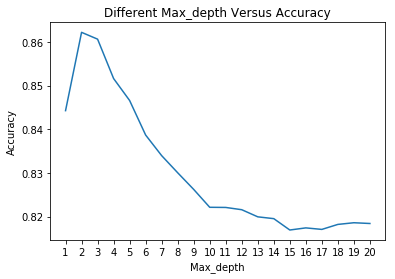

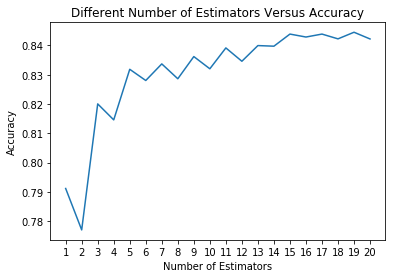

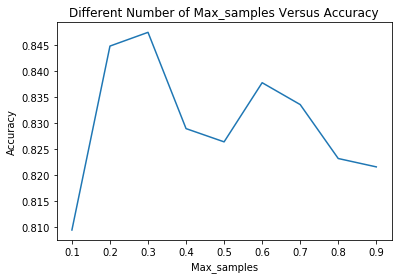

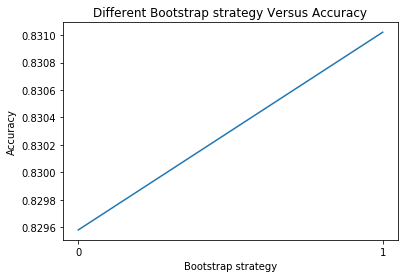

In [8]:
max_depth_acc = np.mean(accuracy, axis = (1,2,3))
n_estimators_acc = np.mean(accuracy, axis = (0,2,3))
max_samples_acc = np.mean(accuracy, axis = (0,1,3))
bootstrap_acc = np.mean(accuracy, axis = (0,1,2))

plt.figure()
plt.title("Different Max_depth Versus Accuracy")
plt.plot(max_depth, max_depth_acc)
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, 21))
plt.show()

plt.figure()
plt.title("Different Number of Estimators Versus Accuracy")
plt.plot(n_estimators, n_estimators_acc)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, 21))
plt.show()

plt.figure()
plt.title("Different Number of Max_samples Versus Accuracy")
plt.plot(np.arange(1, 10) / 10.0, max_samples_acc)
plt.xlabel("Max_samples")
plt.ylabel("Accuracy")
plt.show()

plt.figure()
plt.title("Different Bootstrap strategy Versus Accuracy")
plt.plot(bootstrap, bootstrap_acc)
plt.xlabel("Bootstrap strategy")
plt.ylabel("Accuracy")
plt.xticks([0, 1])
plt.show()

8) Why do we use Bootstraping when we create our datasets? Did you use replacement ? Why ? (1 points) 

For large enough samples Bootstrap sampling will closely approximate any sampling distribution estimated from the full population.
We performed experiments both with and without replacement and although the test with replacement always shows better results in terms of accuracy, the difference is small. However, we should still use replacement because otherwise, our later sampling may depend on the previous sampling and in that case, our sampling is not really random.

9)  Use a Decision Forest to classify the new dataset (4 points)



In [9]:
## ADD YOUR CODE HERE
model = RandomForestClassifier(n_estimators = 10, random_state = 42)
model.fit(x_train_poly,y_train)
print('accuracy: ', model.score(x_test_poly,y_test))

accuracy:  0.82


10) Modulate the number of trees to 1-99 with a step of 10. Plot accuracy versus number of trees. (4 points)



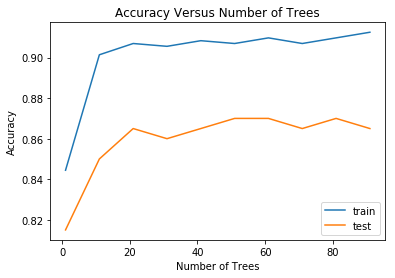

best accuracy:  0.87
best number of trees:  51


In [10]:
## ADD YOUR CODE HERE
train_acc = []
test_acc = []
best = 0
bestNum = 0
numberOfTrees = np.arange(1, 99, 10)
numberOfTrees = numberOfTrees.astype(int)
for num in numberOfTrees:
    model = RandomForestClassifier(n_estimators = num, 
            max_depth = 6, random_state = 42)
    model.fit(x_train_poly,y_train)
    score = model.score(x_train_poly,y_train)
    train_acc.append(score)
    score = model.score(x_test_poly,y_test)
    test_acc.append(score)
    if(best<score):
        best = score
        bestNum = num
plt.figure()
plt.title("Accuracy Versus Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.plot(numberOfTrees, train_acc, label='train')
plt.plot(numberOfTrees, test_acc, label='test')
plt.legend()
plt.show()
print('best accuracy: ', best)
print('best number of trees: ', bestNum)


11) Modulate the depth of  the trees from 1 to 20 - use best number of trees from above. Plot the accuracy versus depth. (4 points)



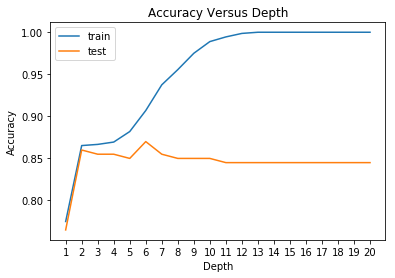

best accuracy:  0.87
best depth:  6


In [11]:
## ADD YOUR CODE HERE
train_acc = []
test_acc = []
best = 0
bestNum11 = 0
depth = range(1,21)
for num in depth:
    model = RandomForestClassifier(n_estimators = bestNum, max_depth = num, random_state = 42)
    model.fit(x_train_poly,y_train)
    score = model.score(x_train_poly,y_train)
    train_acc.append(score)
    score = model.score(x_test_poly,y_test)
    test_acc.append(score)
    if(best<score):
        best = score
        bestNum11 = num
plt.figure()
plt.title("Accuracy Versus Depth")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.xticks(depth)
plt.plot(depth, train_acc, label='train')
plt.plot(depth, test_acc, label='test')
plt.legend()
plt.show()
print('best accuracy: ', best)
print('best depth: ', bestNum11)

12) Comment on the performance change while you modulate depth of trees and number of trees (3 points)

Generally, the bigger the number of trees, the greater the accuracy is. We could observe a clear gap between the accuracy on training and test data since the depth we selected (max_depth = 6) caused the model to overfit the training set. However, on the other hand, as we changed the depth, the accuracy on test data quick stabilized on test data but maintained the ascending trend on training data. This shows that the model overfitted to training data when the trees have a depth that is bigger than 2.


13) Visualise how the classification split is done in relation to the data both for Decision Tree and Decision Forest (3 points)

In [18]:
## ADD YOUR CODE HERE

from sklearn.manifold.t_sne import TSNE
from sklearn.neighbors.classification import KNeighborsClassifier
def plot_decision_boundary(model,X,y):
    Y_pred=model.predict(X)
    X_Train_embedded = TSNE(n_components=2).fit_transform(X)
    # create meshgrid
    resolution = 100 # 100x100 background pixels
    X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]) ,np.max(X_Train_embedded[:,0])
    X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]),np.max(X_Train_embedded[:,1])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution),np.linspace(X2d_ymin, X2d_ymax, resolution))

    # approximate Voronoi tesselation on resolution x resolution grid using 1-NN
    background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded
                                                               , Y_pred) 
    voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
    voronoiBackground = voronoiBackground.reshape((resolution, resolution))

    #plot
    plt.contourf(xx, yy, voronoiBackground)
    plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y)
    plt.show()

In [19]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image, display
import matplotlib.image as mpimg

clf_DT = tree.DecisionTreeClassifier(random_state = 42)
clf_DT.fit(x_train_poly, y_train)

numberOfTrees = 3
clf_RF = RandomForestClassifier(n_estimators = numberOfTrees, random_state = 42)
clf_RF.fit(x_train_poly, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Desicion Tree: 


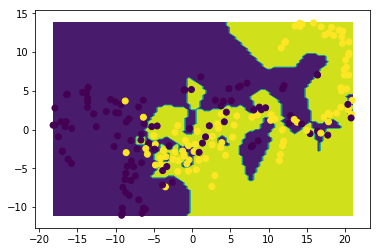

Random Forest: 


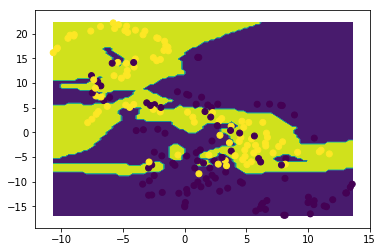

In [20]:
print ('Desicion Tree: ')
plot_decision_boundary(clf_DT, x_test_poly, y_test)
print ('Random Forest: ')
plot_decision_boundary(clf_RF, x_test_poly, y_test)


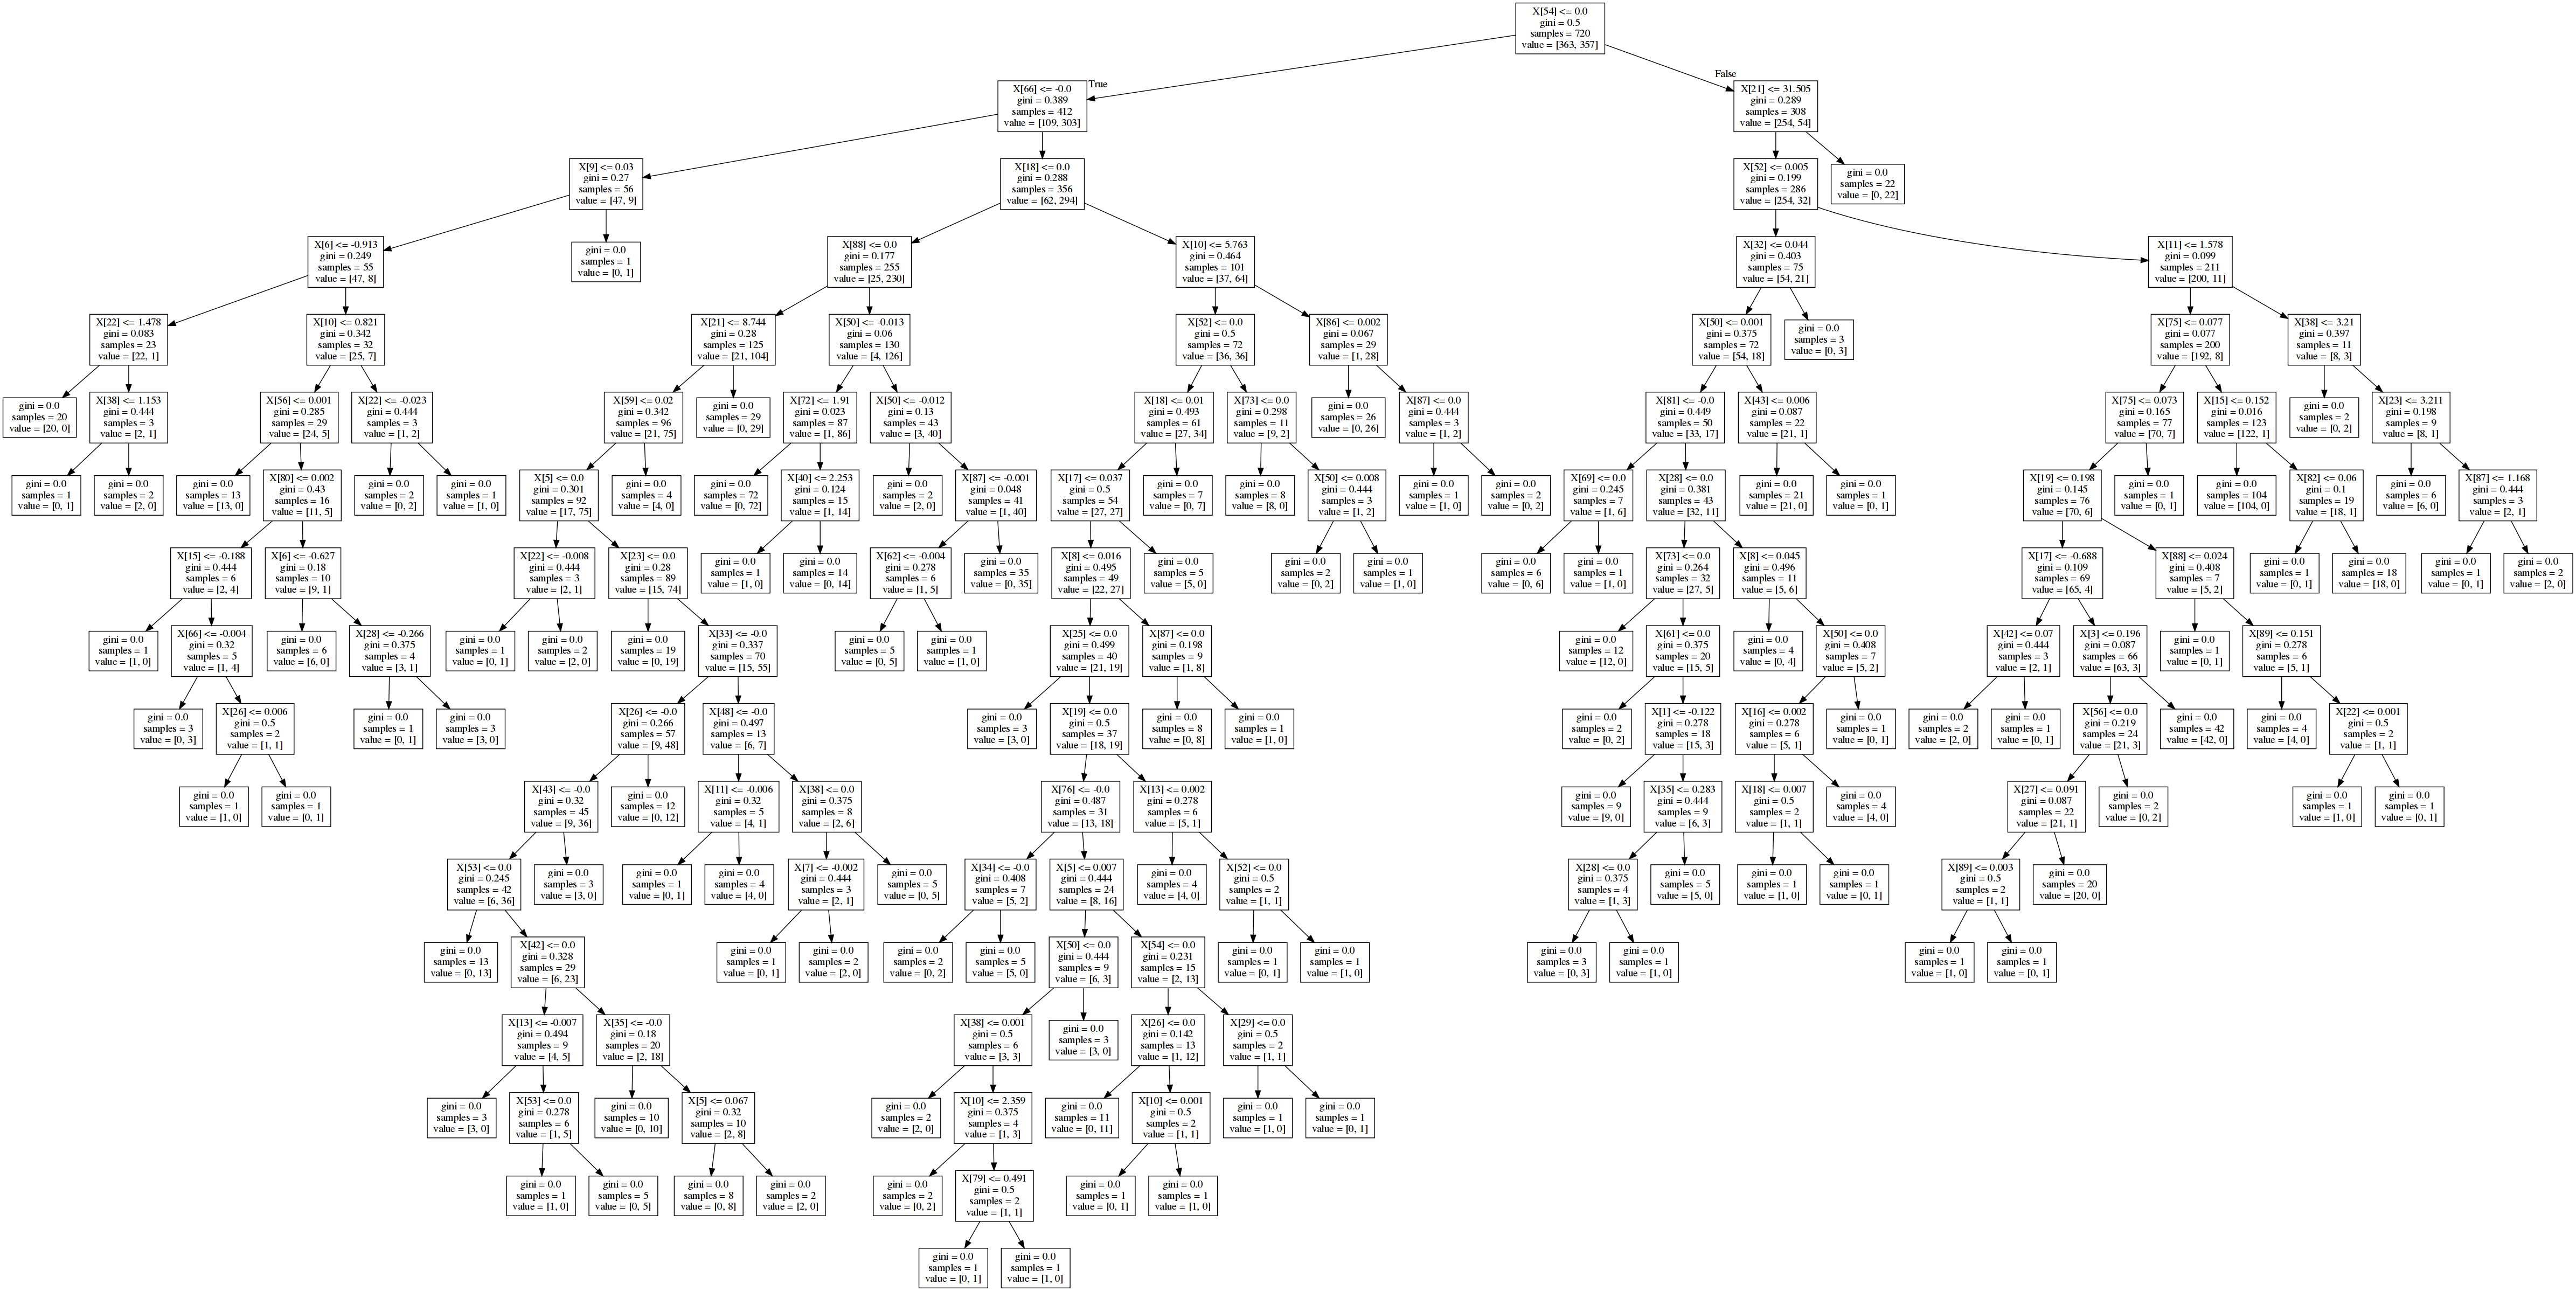

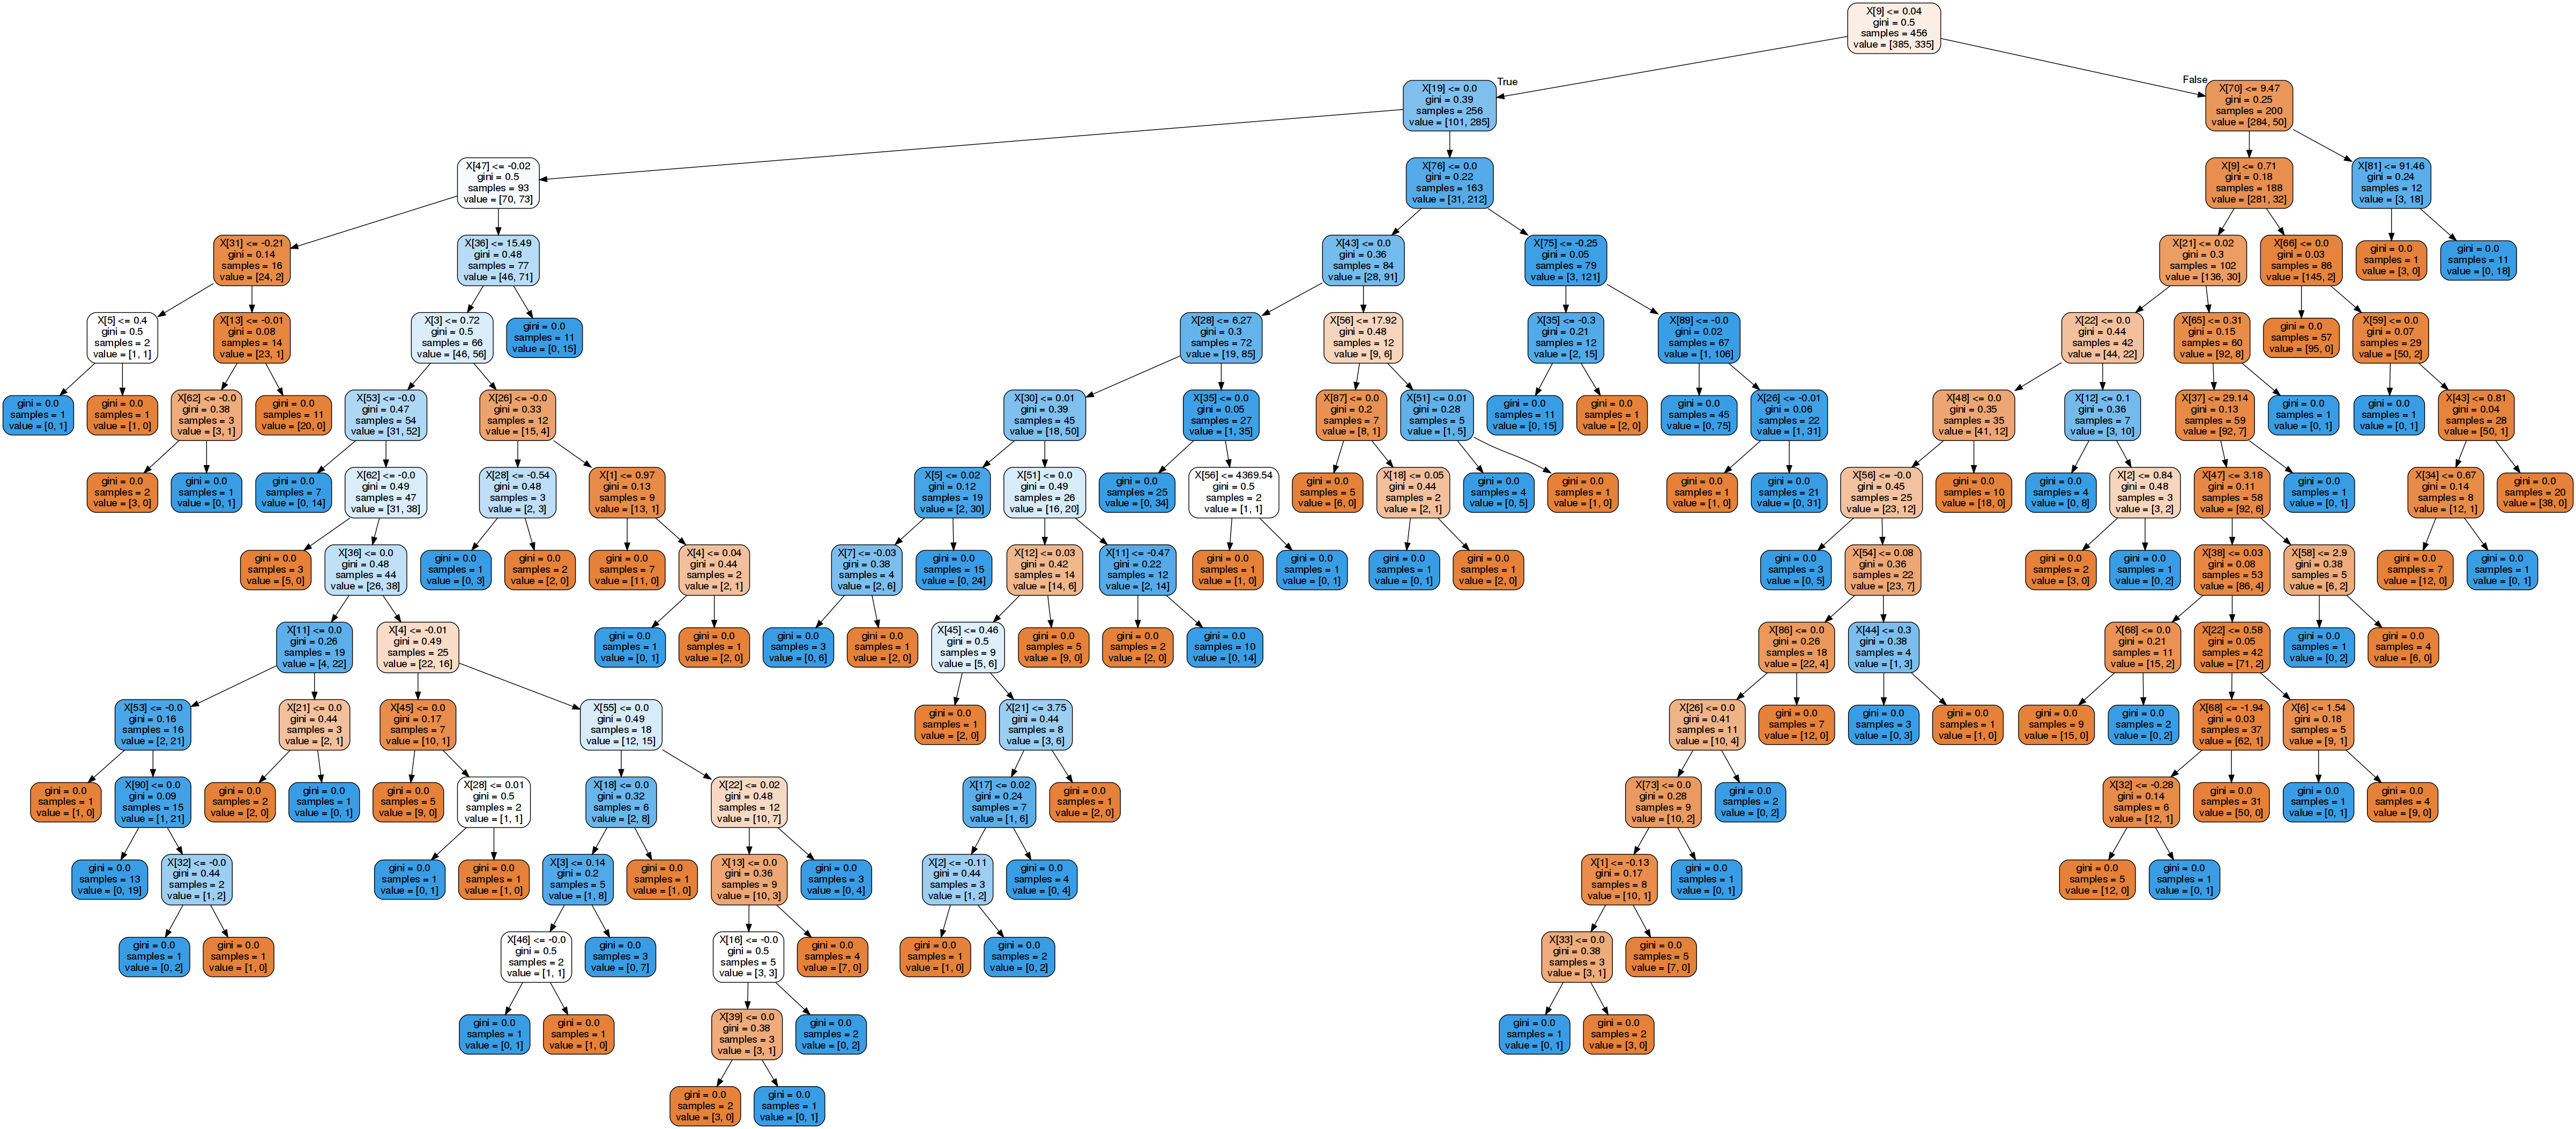

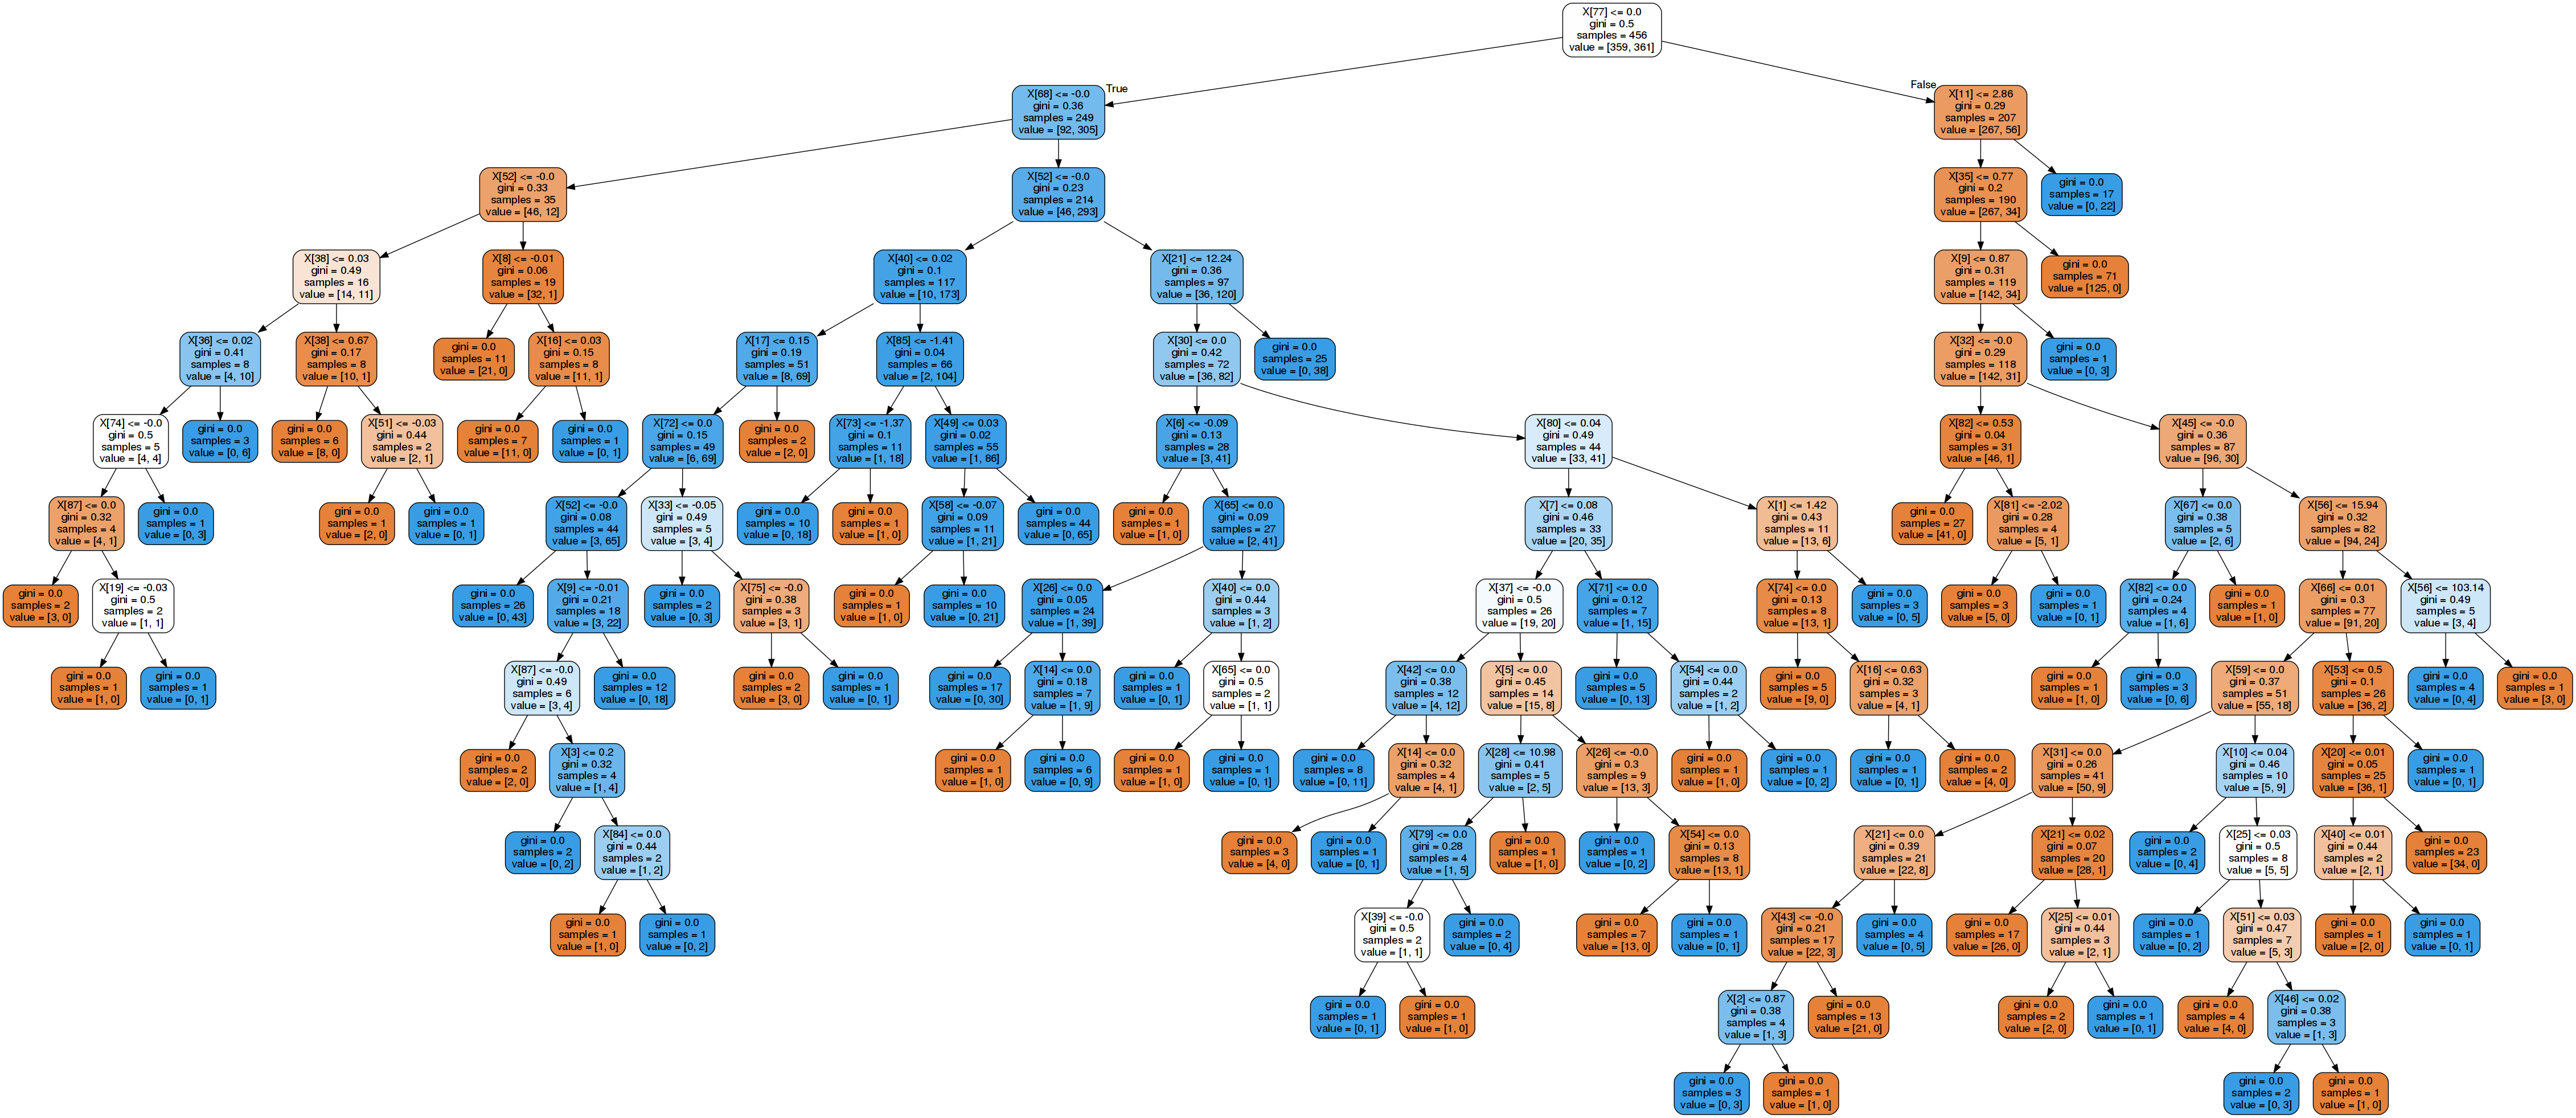

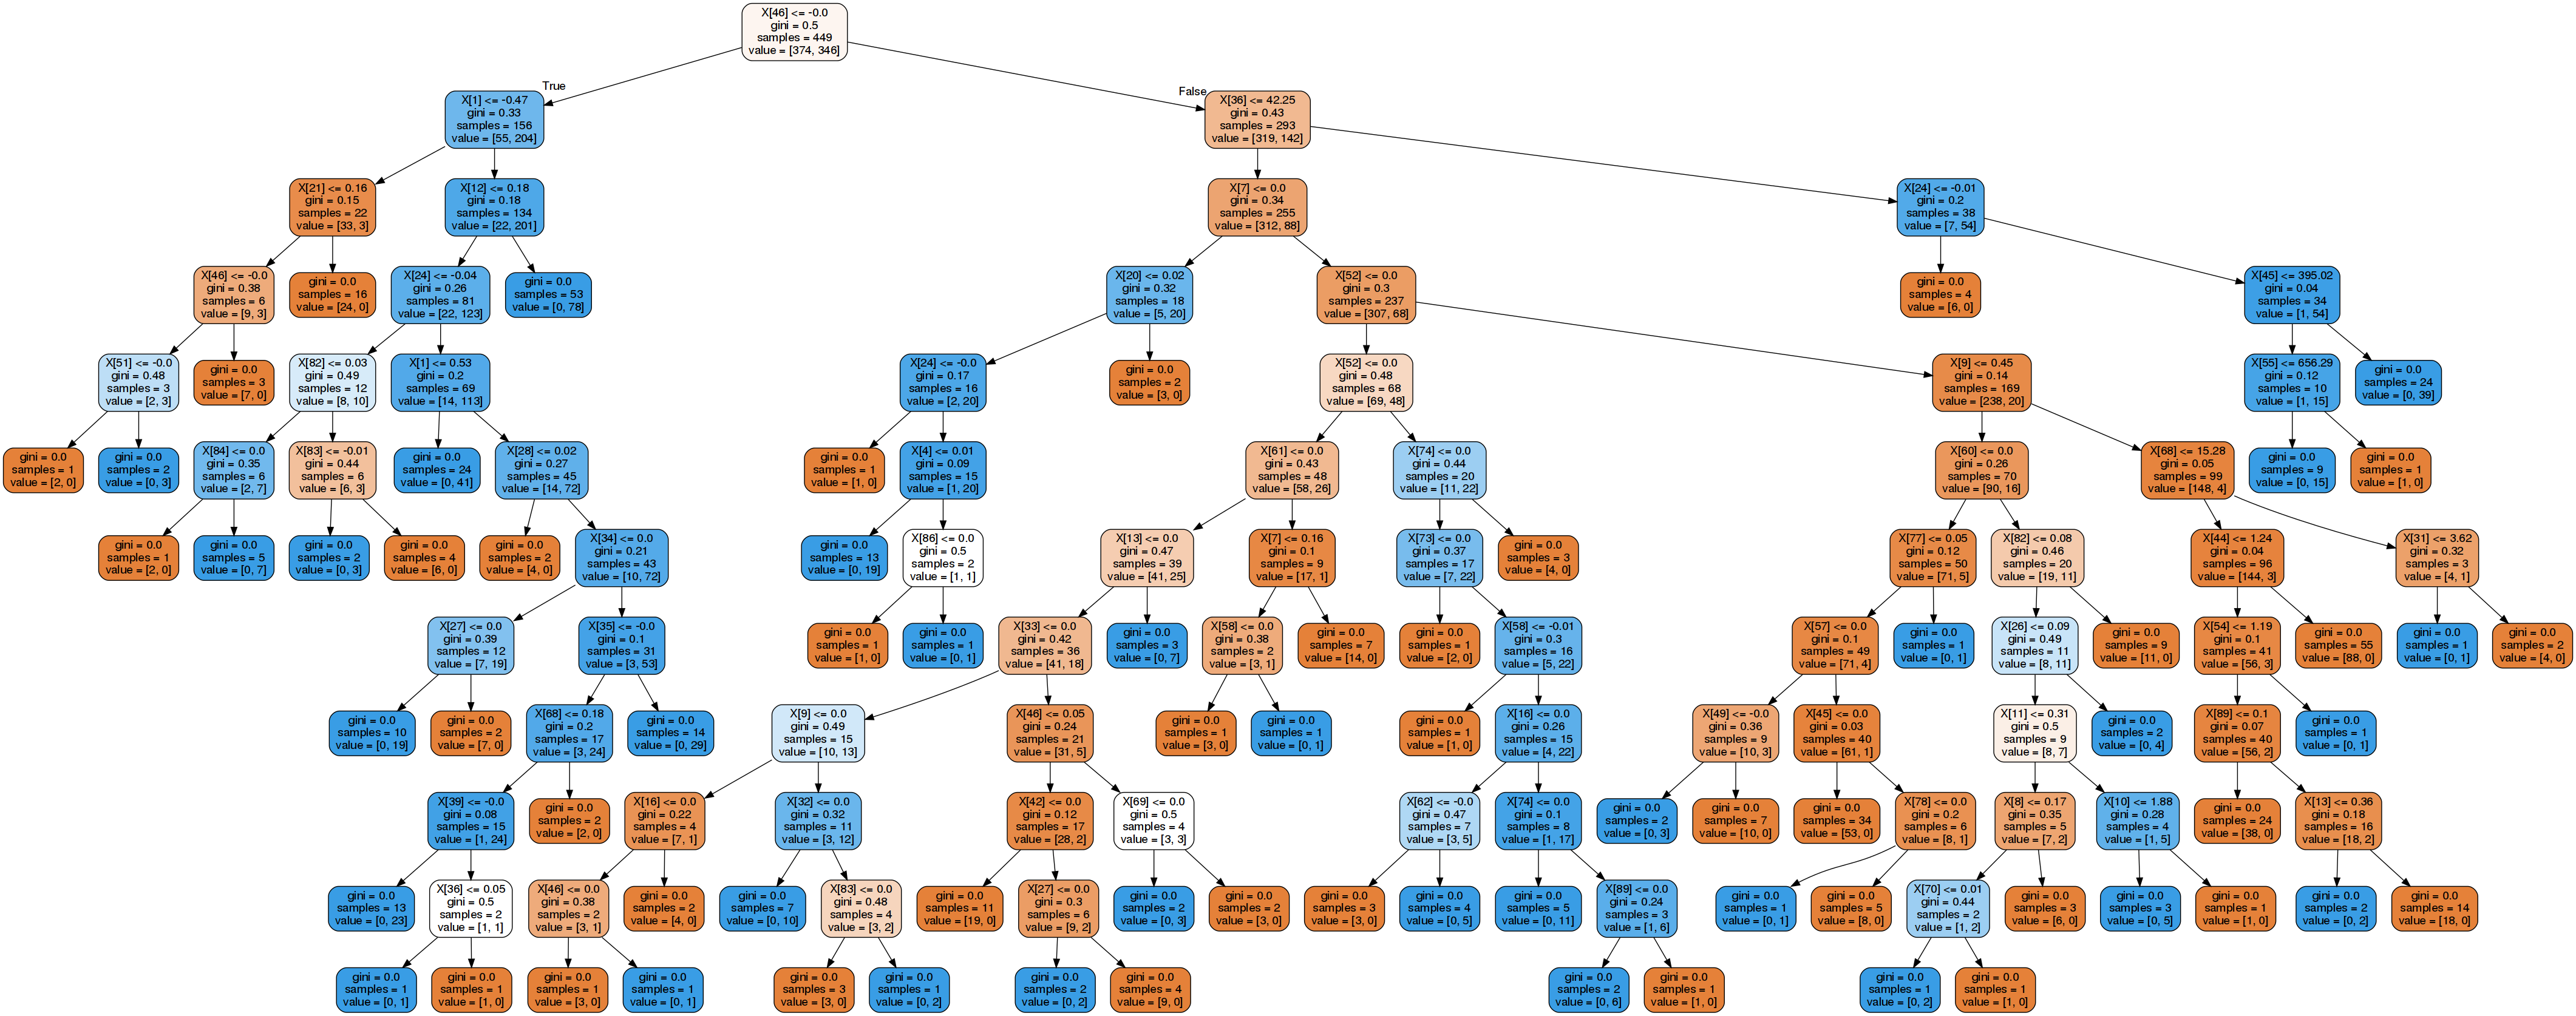

In [21]:

tree.export_graphviz(clf_DT, out_file='decisiontree.dot') 

TreeForest = []
call(['dot', '-Tpng', 'decisiontree.dot', '-o', 'decisiontree.png', '-Gdpi=100'])
TreeForest.append(Image(filename = 'decisiontree.png'))
for i in range(numberOfTrees):
    estimator = clf_RF.estimators_[i]
    tree.export_graphviz(estimator, out_file='randomforest_' + str(i) + '.dot'
                         ,rounded = True, proportion = False, 
                precision = 2, filled = True) 
    call(['dot', '-Tpng', 'randomforest_' + str(i) + '.dot', '-o', 
          'randomforest_' + str(i) + '.png', '-Gdpi=100'])
    TreeForest.append(Image(filename = 'randomforest_' + str(i) + '.png'))
    

display(*TreeForest)


## Question 2 (50 Points)
In this question we will be using the fashion-MNIST dataset for image classification. 

If you are interested, you may find relevant information regarding the dataset in this paper:
Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

The data is provided under `/vol/lab/course/416/data/fashion`. The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-dimensional vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 classes, which are labelled as follows:
0. T-shirt/top
1. Trousers
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

**Your tasks are** (all tasks carry equal marks):
- Use a Decision Forest to classify t-shirts and ankle boots - tune your forest!
- Train and compare an Adaboost classifier with a decision tree 
- Modulate the number of trees in the Adaboost and the depth of the trees. Comment on the performance and complexity 
- Train a Decsiion Forest for all classes and also compare the performance with another ensemble algorithm of your choice
- What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)

In [22]:
# load the data
import numpy as np
import pandas as pd

data_dir = '/vol/lab/course/416/data/fashion/'

df_train = pd.read_csv(data_dir + 'fashion_mnist_train.csv')
df_test = pd.read_csv(data_dir + 'fashion_mnist_test.csv')

x_train = df_train.drop('label', axis=1).as_matrix().astype(np.uint8)
y_train = df_train['label'].as_matrix().astype(np.uint8)
x_test = df_test.drop('label', axis=1).as_matrix().astype(np.uint8)
y_test = df_test['label'].as_matrix().astype(np.uint8)

/vol/bitbucket/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/vol/bitbucket/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/vol/bitbucket/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/vol/bitbucket/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [24]:
np.random.seed(42)
## ADD YOUR CODE HERE
def sample_data_digits(data, labels, labels_to_select):
    # convert input 3d arrays to 2d arrays
    
    nsamples, nx = data.shape
    
    data_vec = np.reshape(data,(nsamples,nx))
   
    selected_indexes = np.isin(labels, labels_to_select)
    selected_data = data_vec[selected_indexes]
    selected_labels = labels[selected_indexes]
    
    
    # Convert images from gray to binary by thresholding intensity values
    selected_data = 1.0 * (selected_data >= 128)

    # convert labels to binary: digit_1=False, digit_2=True
    selected_labels = selected_labels==labels_to_select[1]
    # shuffle data
    shuffle_index = np.random.permutation(len(selected_labels))
    selected_data, selected_labels = selected_data[shuffle_index],selected_labels[shuffle_index]
     
    return selected_data, selected_labels


labels_to_select = [0,9]
selected_train_data, selected_train_labels = sample_data_digits(x_train,y_train,labels_to_select)
selected_test_data, selected_test_labels = sample_data_digits(x_test,y_test,labels_to_select)

# Use a Decision Forest to classify t-shirts and ankle boots - tune your forest!

In [25]:
import time
max_depth = range(1, 21)
n_estimators = range(1, 21)
accuracy = np.zeros((len(max_depth), len(n_estimators)))

for i in max_depth:
    for j in n_estimators:
        model = RandomForestClassifier(n_estimators = j, max_depth=i, random_state = 42)
        model.fit(selected_train_data, selected_train_labels)
        score = model.score(selected_test_data, selected_test_labels)
        accuracy[i - 1, j - 1] = score
                    


In [26]:
best_params = np.unravel_index(accuracy.argmax(), accuracy.shape)
best_max_depth_forest = best_params[0] + 1
best_n_estimators_forest = best_params[1] + 1
print ("best max_depth: ", best_max_depth_forest)
print ("best n_estimators: ", best_n_estimators_forest)

start = time.clock()
best_model = RandomForestClassifier(n_estimators = best_n_estimators_forest, max_depth=best_max_depth_forest, random_state = 42).fit(selected_train_data, selected_train_labels)
best_score = best_model.score(selected_test_data, selected_test_labels)
end = time.clock()
print ("best accuracy: ", best_score)
print ('time: ', end - start)

best max_depth:  19
best n_estimators:  4
best accuracy:  0.9975
time:  0.09261500000002343


# Train and compare an Adaboost classifier with a decision tree


In [27]:

best_max_depth_ada = best_max_depth_forest
best_n_estimators_ada = best_n_estimators_forest

In [28]:
best_params = np.unravel_index(accuracy.argmax(), accuracy.shape)
best_max_depth_ada = best_params[0] + 1
best_n_estimators_ada = best_params[1] + 1
print ("best max_depth: ", best_max_depth_ada)
print ("best n_estimators: ", best_n_estimators_ada)

start = time.clock()
base_estimator = tree.DecisionTreeClassifier(max_depth=best_max_depth_ada, 
                                             random_state = 42)
best_model = AdaBoostClassifier(base_estimator=base_estimator, 
                                n_estimators = best_n_estimators_ada, 
                                random_state = 42)
best_model.fit(selected_train_data, selected_train_labels)
best_score = best_model.score(selected_test_data, selected_test_labels)
end = time.clock()
print ("best accuracy: ", best_score)
print ('time: ', end - start)

best max_depth:  19
best n_estimators:  4
best accuracy:  0.9965
time:  2.679726999999957


# Comparison
To compare the two approaches, we use the best pair of hyperparameters we tuned earlier for the decision forest. With the same maximum depth and number of parameters, Adaboost classifier achieved slightly better accuracy but with significantly longer running time.

# Modulate the number of trees in the Adaboost and the depth of the trees. 

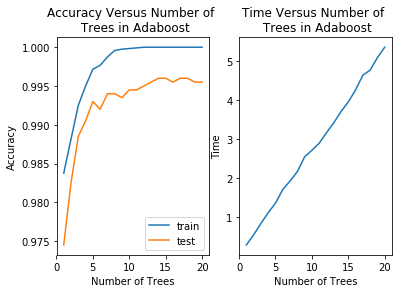

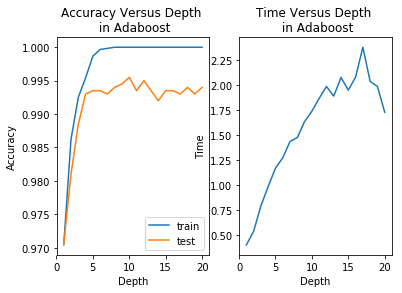

In [29]:
test_acc = []
train_acc = []
times = []
best = 0
bestNum = 0
numberOfTrees = range(1, 21)
# numberOfTrees = numberOfTrees.astype(int)
base_estimator = tree.DecisionTreeClassifier(max_depth=3,
                                             random_state = 42)
for num in numberOfTrees:
    start = time.clock()
    model = AdaBoostClassifier(base_estimator=base_estimator,
                               n_estimators = num, random_state = 42)
    model.fit(selected_train_data,selected_train_labels)
    end = time.clock()
    test_score = model.score(selected_test_data,selected_test_labels)
    train_score = model.score(selected_train_data,selected_train_labels)
    
    times.append(end - start)
    test_acc.append(test_score)
    train_acc.append(train_score)
    if(best < test_score):
        best = test_score
        bestNum = num
    
plt.figure()
plt.subplot(1,2,1)
plt.title("Accuracy Versus Number of \n Trees in Adaboost")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.plot(numberOfTrees, train_acc, label='train')
plt.plot(numberOfTrees, test_acc, label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title("Time Versus Number of \n Trees in Adaboost")
plt.xlabel("Number of Trees")
plt.ylabel("Time")
plt.plot(numberOfTrees, times)
# print(best)
# print(bestNum)
plt.show()

test_acc = []
train_acc = []
times = []
best = 0
bestNum = 0
depth = range(1, 21)
for num in depth:
    base_estimator = tree.DecisionTreeClassifier(max_depth=num, 
                                                 random_state = 42)
    start = time.clock()
    model = AdaBoostClassifier(base_estimator=base_estimator, 
                               n_estimators = 3,
                               random_state = 42)
    model.fit(selected_train_data,selected_train_labels)
    end = time.clock()
    test_score = model.score(selected_test_data,
                             selected_test_labels)
    train_score = model.score(selected_train_data,
                              selected_train_labels)
    
    times.append(end - start)
    test_acc.append(test_score)
    train_acc.append(train_score)
    if(best < test_score):
        best = test_score
        bestNum = num
plt.figure()

plt.subplot(1,2,1)
plt.title("Accuracy Versus Depth \n in Adaboost")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.plot(depth, train_acc, label='train')
plt.plot(depth, test_acc, label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title("Time Versus Depth \n in Adaboost")
plt.xlabel("Depth")
plt.ylabel("Time")
plt.plot(depth, times)
plt.show()
# print(best)
# print(bestNum)

# Comment on the performance and complexity
To reduce the effect of overfitting, in both rounds of tests, we set the fixed hyperparameter to 3. Generally, as the number of trees increased, the test accuracy started from a high value and converged to a very high value. However, due to overfitting, the test accuracy is always lower than the training accuracy. In the meantime, the running time or complexity increased linearly. On the other hand, as we changed the depth with a fixed number of estimators, the change of accuracy is similar to before and overfit still took place. Though we could also observe an increase in complexity, instead of being linear, the growth is more logarithmic.

# Train a Decsiion Forest for all classes and also compare the performance with another ensemble algorithm of your choice


In [30]:
start = time.clock()
model = RandomForestClassifier(n_estimators = best_n_estimators_forest,
                               max_depth=best_max_depth_forest,
                               criterion = 'entropy',
                               random_state = 42)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
end = time.clock()
print('Random Forest Accuracy: ', acc)
print ('Random Forest Time: ', end - start)

start = time.clock()
base_estimator = tree.DecisionTreeClassifier(max_depth=best_max_depth_ada,
                                             criterion = 'entropy', 
                                             random_state = 42)
model = AdaBoostClassifier(base_estimator=base_estimator, 
                           n_estimators = best_n_estimators_ada,
                           random_state = 42)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
end = time.clock()
print('AdaBoost Accuracy: ', acc)
print ('AdaBoost Time: ', end - start)

Random Forest Accuracy:  0.8245
Random Forest Time:  3.036561000000006
AdaBoost Accuracy:  0.8255
AdaBoost Time:  127.01951099999997


# Comparison
We chose AdaBoost as the other ensemble algorithm. Again, we used the best set of hyperparameters we tuned earlier. The accuracies of both methods are still similar, but Adaboost is significantly more complex in terms of computation.

# What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)
Random Forests and Adaboost classifiers try to achieve a low error rate in two different ways. As a parallel ensemble algorithm, Random Forests usually start with complex base models, i.e., trees with low bias but high variance. By combining these independent parallel models, the impact of isolated errors is averaged away to reduce the variance of prediction. On the other hand, as a sequential ensemble algorithm, Adaboost classifiers usually consist of weak models with low variance but high bias. All base models are not independent so that during training a complementary set of predictors are learned to reduce the bias.